In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset20.11.csv', sep=';')
df = df.dropna()
df

,group_url,from_id,owner_id,text
0,samsung.galaxy_a,-24240100,-24240100,Стала известна точная дата выхода Galaxy S21\r...
2,samsung.galaxy_a,484272225,-24240100,У кого на А01 есть внутренняя запись экрана?
3,samsung.galaxy_a,563762178,-24240100,Можно ли поставить гугл камеру на j8?
4,samsung.galaxy_a,-24240100,-24240100,Инсайдер раскрыл технические характеристики Sn...
5,samsung.galaxy_a,312139742,-24240100,Пришло обновление а51 в Казахстан
...,...,...,...,...
17606,ru_oppo,189630066,-139809093,Специалисты ресурса gizmochina решили проверит...
17607,ru_oppo,375540195,-139809093,OPPO брат естественных условиях
17608,ru_oppo,189630066,-139809093,Представители компании Oppo вчера сообщили о т...
17609,ru_oppo,189630066,-139809093,Сегодня компания Oppo заявила о 3 млн смартфон...


In [3]:
p_data = pd.read_csv('data/positive.csv', sep=';', header=None)
n_data = pd.read_csv('data/negative.csv', sep=';', header=None)
p_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
114906,411368729235054592,1386912922,diminlisenok,"Спала в родительском доме, на своей кровати......",1,0,0,0,1497,56,34,2
114907,411368729424187392,1386912922,qilepocagotu,RT @jebesilofyt: Эх... Мы немного решили сокра...,1,0,1,0,692,225,210,0
114908,411368796537257984,1386912938,DennyChooo,"Что происходит со мной, когда в эфире #proacti...",1,0,0,0,4905,448,193,13
114909,411368797447417856,1386912938,bedowabymir,"""Любимая,я подарю тебе эту звезду..."" Имя како...",1,0,0,0,989,254,251,0


In [4]:
dataset = pd.concat([p_data[:50000], n_data[:50000]])
dataset = dataset[[3, 4]]
dataset.columns = ['text', 'label']
dataset['label'] = dataset['label'].apply(lambda x: 1 if x == -1 else 0)
dataset

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",0
1,"Да, все-таки он немного похож на него. Но мой ...",0
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,0
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",0
4,@irina_dyshkant Вот что значит страшилка :D\nН...,0
...,...,...
49995,"Чёрт, не получилось ничего снять:(\nС микрофо...",1
49996,Устала( Немного поддержки и тепла не помешало ...,1
49997,"Миса говорила, что в тви весело, да нихуя. Ник...",1
49998,"фу, ты реально зазналась — фууууу(((( http://t...",1


In [5]:
def text_cleaner(text):
    text = text.lower()
    alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
    
    cleaned_text = ''
    for char in text:
        if (char.isalpha() and char[0] in alph) or (char == ' '):
            cleaned_text += char
            
    return cleaned_text.strip()

In [6]:
%%time
dataset['cleaned'] = dataset['text'].apply(text_cleaner)
dataset

Wall time: 1.51 s


,text,label,cleaned
0,"@first_timee хоть я и школота, но поверь, у на...",0,хоть я и школота но поверь у нас то же самое ...
1,"Да, все-таки он немного похож на него. Но мой ...",0,да всетаки он немного похож на него но мой мал...
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,0,ну ты идиотка я испугалась за тебя
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",0,кто то в углу сидит и погибает от голода а мы ...
4,@irina_dyshkant Вот что значит страшилка :D\nН...,0,вот что значит страшилка но блинпосмотрев все ...
...,...,...,...
49995,"Чёрт, не получилось ничего снять:(\nС микрофо...",1,чёрт не получилось ничего снятьс микрофонами ...
49996,Устала( Немного поддержки и тепла не помешало ...,1,устала немного поддержки и тепла не помешало б...
49997,"Миса говорила, что в тви весело, да нихуя. Ник...",1,миса говорила что в тви весело да нихуя никто ...
49998,"фу, ты реально зазналась — фууууу(((( http://t...",1,фу ты реально зазналась фууууу


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

positive_vector = TfidfVectorizer(lowercase=True, max_df=0.1, min_df=0.0001).fit_transform(dataset[dataset.label == 0].cleaned)
negative_vector = TfidfVectorizer(lowercase=True, max_df=0.1, min_df=0.0001).fit_transform(dataset[dataset.label == 1].cleaned)

print(positive_vector.shape)
print(negative_vector.shape)

(50000, 9456)
(50000, 9024)


In [13]:
%%time
from sklearn.cluster import dbscan

positive_cluster = dbscan(positive_vector, eps=0.3, min_samples=10, n_jobs=-1)

Wall time: 58.9 s


In [43]:
sum(positive_cluster[1] == 0)

531

In [35]:
%%time
negative_cluster = dbscan(negative_vector, eps=0.3, min_samples=10, n_jobs=-1)

In [44]:
sum(negative_cluster[1] == 0)

440

In [61]:
dataset_clustered = pd.concat([dataset[dataset.label == 0][positive_cluster[1] == -1],
                     dataset[dataset.label == 1][negative_cluster[1] == -1]], ignore_index=True)
dataset_clustered

,text,label,cleaned
0,"@first_timee хоть я и школота, но поверь, у на...",0,хоть я и школота но поверь у нас то же самое ...
1,"Да, все-таки он немного похож на него. Но мой ...",0,да всетаки он немного похож на него но мой мал...
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,0,ну ты идиотка я испугалась за тебя
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",0,кто то в углу сидит и погибает от голода а мы ...
4,@irina_dyshkant Вот что значит страшилка :D\nН...,0,вот что значит страшилка но блинпосмотрев все ...
...,...,...,...
97784,"Чёрт, не получилось ничего снять:(\nС микрофо...",1,чёрт не получилось ничего снятьс микрофонами ...
97785,Устала( Немного поддержки и тепла не помешало ...,1,устала немного поддержки и тепла не помешало б...
97786,"Миса говорила, что в тви весело, да нихуя. Ник...",1,миса говорила что в тви весело да нихуя никто ...
97787,"фу, ты реально зазналась — фууууу(((( http://t...",1,фу ты реально зазналась фууууу


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset_clustered['cleaned'], dataset_clustered['label'], test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(78231,)
(19558,)


In [63]:
def plot_classification_report(classificationReport,
                               title='Classification report'):
    df = pd.DataFrame(classificationReport).T.iloc[:,:3]
    df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])
    return df

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase=True)
x_train_tf = vectorizer.fit_transform(X_train)
x_test_tf = vectorizer.transform(X_test)
print(x_train_tf.shape)

(78231, 114102)


In [72]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_tf, y_train)

predictions = model.predict(x_test_tf)

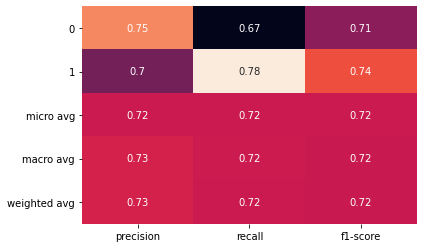

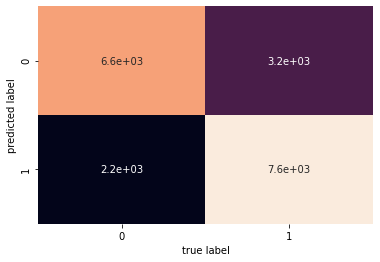

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True)),
            square=False, annot=True, cbar=False)
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [74]:
df['label'] = model.predict(vectorizer.transform(df.text))
df

,group_url,from_id,owner_id,text,label
0,samsung.galaxy_a,-24240100,-24240100,Стала известна точная дата выхода Galaxy S21\r...,0
2,samsung.galaxy_a,484272225,-24240100,У кого на А01 есть внутренняя запись экрана?,1
3,samsung.galaxy_a,563762178,-24240100,Можно ли поставить гугл камеру на j8?,0
4,samsung.galaxy_a,-24240100,-24240100,Инсайдер раскрыл технические характеристики Sn...,0
5,samsung.galaxy_a,312139742,-24240100,Пришло обновление а51 в Казахстан,1
...,...,...,...,...,...
17606,ru_oppo,189630066,-139809093,Специалисты ресурса gizmochina решили проверит...,1
17607,ru_oppo,375540195,-139809093,OPPO брат естественных условиях,0
17608,ru_oppo,189630066,-139809093,Представители компании Oppo вчера сообщили о т...,0
17609,ru_oppo,189630066,-139809093,Сегодня компания Oppo заявила о 3 млн смартфон...,0


In [79]:
df.loc[17606].text

'Специалисты ресурса gizmochina решили проверить эффективность технологий быстрой зарядки в смартфонах Huawei, Oppo, Vivo, Samsung и iPhone 7 Plus. В итоге в тестировании приняли участие Huawei Mate 9, Oppo R9S Plus, Vivo X9 Plus, Samsung Galaxy C9 Pro и iPhone 7 Plus, АКБ которых были разряжены до 0%.'

In [80]:
df[df.label == 0].text

0        Стала известна точная дата выхода Galaxy S21\r...
3                    Можно ли поставить гугл камеру на j8?
4        Инсайдер раскрыл технические характеристики Sn...
6        Samsung представил новый сенсор Vizion 33D для...
7         Здравствуйте. Где можно скачать гугл камеру? А71
                               ...                        
17605    Китайский бренд Oppo готовит к релизу свои топ...
17607                      OPPO брат естественных условиях
17608    Представители компании Oppo вчера сообщили о т...
17609    Сегодня компания Oppo заявила о 3 млн смартфон...
17610    2016 год для компании Oppo оказался крайне усп...
Name: text, Length: 7895, dtype: object

In [81]:
df[df.label == 0]

,group_url,from_id,owner_id,text,label
0,samsung.galaxy_a,-24240100,-24240100,Стала известна точная дата выхода Galaxy S21\r...,0
3,samsung.galaxy_a,563762178,-24240100,Можно ли поставить гугл камеру на j8?,0
4,samsung.galaxy_a,-24240100,-24240100,Инсайдер раскрыл технические характеристики Sn...,0
6,samsung.galaxy_a,-24240100,-24240100,Samsung представил новый сенсор Vizion 33D для...,0
7,samsung.galaxy_a,40969143,-24240100,Здравствуйте. Где можно скачать гугл камеру? А71,0
...,...,...,...,...,...
17605,ru_oppo,189630066,-139809093,Китайский бренд Oppo готовит к релизу свои топ...,0
17607,ru_oppo,375540195,-139809093,OPPO брат естественных условиях,0
17608,ru_oppo,189630066,-139809093,Представители компании Oppo вчера сообщили о т...,0
17609,ru_oppo,189630066,-139809093,Сегодня компания Oppo заявила о 3 млн смартфон...,0


In [82]:
df[df.label == 0].to_csv('sentimented_dataset.csv', index=False)

In [83]:
df.groupby('group_url').count()[['from_id']]

,from_id
group_url,
huaweip20,3909
kupit_iphone_v_moskve,2549
ru_oppo,332
rumicomrussia,4876
samsung.galaxy_a,4613


In [84]:
df = df[df.from_id > 0]
df

,group_url,from_id,owner_id,text,label
2,samsung.galaxy_a,484272225,-24240100,У кого на А01 есть внутренняя запись экрана?,1
3,samsung.galaxy_a,563762178,-24240100,Можно ли поставить гугл камеру на j8?,0
5,samsung.galaxy_a,312139742,-24240100,Пришло обновление а51 в Казахстан,1
7,samsung.galaxy_a,40969143,-24240100,Здравствуйте. Где можно скачать гугл камеру? А71,0
8,samsung.galaxy_a,72674288,-24240100,"При загрузке фото в ВК, изображение сильно уре...",1
...,...,...,...,...,...
17605,ru_oppo,189630066,-139809093,Китайский бренд Oppo готовит к релизу свои топ...,0
17606,ru_oppo,189630066,-139809093,Специалисты ресурса gizmochina решили проверит...,1
17607,ru_oppo,375540195,-139809093,OPPO брат естественных условиях,0
17608,ru_oppo,189630066,-139809093,Представители компании Oppo вчера сообщили о т...,0


In [85]:
df.groupby('group_url').count()[['from_id']]

,from_id
group_url,
huaweip20,3899
ru_oppo,236
rumicomrussia,4228
samsung.galaxy_a,4334


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12697 entries, 2 to 17609
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   group_url  12697 non-null  object
 1   from_id    12697 non-null  int64 
 2   owner_id   12697 non-null  int64 
 3   text       12697 non-null  object
 4   label      12697 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 595.2+ KB


In [87]:
df.nunique()

group_url        4
from_id       5214
owner_id         4
text         12510
label            2
dtype: int64

In [88]:
print('1:', sum(df['label'] == 1))
print('0:', sum(df['label'] == 0))

1: 6661
0: 6036
